In [34]:
import pandas as pd
import numpy as np
import geopandas 
import os
import matplotlib.pyplot as plt
base_path = os.environ['SCRATCH']

In [29]:
county_map_folder = os.path.join(base_path, "twitter-action/depression/county-map")
county_map_list_path = [os.path.join(county_map_folder, x) for x in os.listdir(county_map_folder) if x.endswith("geojson")]
output_folder = os.path.join(base_path, "twitter-action/depression/county-stress")

In [39]:
def read_geojson(geojson_path):
    return geopandas.read_file(geojson_path)

def read_all_geojson(geojson_path_list):
    for geojson_path in geojson_path_list:
        output_csv_name = geojson_path.split("/")[-1]
        county_geojson = read_geojson(geojson_path)
        county_geojson['cnty_fips'] = county_geojson['cnty_fips'].astype(np.int64)
        output_df = county_geojson[['cnty_fips', 'avg_stress', 'date', 'geometry']]
        output_path = os.path.join(output_folder, output_csv_name)
        output_df.to_file(output_path, driver='GeoJSON')
    print("all done")
    

In [40]:
read_all_geojson(county_map_list_path)

all done


0       POINT (-86.64130 32.53943)
1       POINT (-87.72495 30.74326)
2       POINT (-85.39238 31.87734)
3       POINT (-87.12772 33.00077)
4       POINT (-86.56705 33.98325)
                   ...            
2724    POINT (-66.21163 18.43235)
2725    POINT (-65.99889 18.33631)
2726    POINT (-66.39784 18.43072)
2727    POINT (-65.89585 18.07002)
2728    POINT (-66.85873 18.08113)
Length: 2729, dtype: geometry

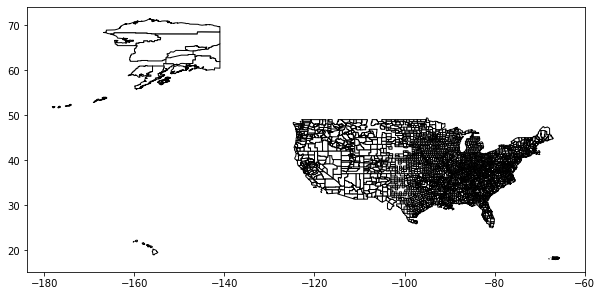

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
sample_j.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
sample_j.centroid

In [38]:
sample_j.head()

,FID,cnty_fips,state_name,state_fips,cnty_name,state_abbr,avg_stress,date,geometry
0,1,1001,Alabama,01,Autauga,AL,0.310666,2020-01-21T00:00:00,"POLYGON ((-86.82067 32.34731, -86.81446 32.370..."
1,2,1003,Alabama,01,Baldwin,AL,0.187905,2020-01-21T00:00:00,"POLYGON ((-87.97309 31.16482, -87.93710 31.173..."
2,3,1005,Alabama,01,Barbour,AL,0.040218,2020-01-21T00:00:00,"POLYGON ((-85.74337 31.62624, -85.71720 31.679..."
3,4,1007,Alabama,01,Bibb,AL,0.086716,2020-01-21T00:00:00,"POLYGON ((-87.41986 33.01177, -87.31532 33.012..."
4,5,1009,Alabama,01,Blount,AL,0.113007,2020-01-21T00:00:00,"POLYGON ((-86.96799 33.86045, -86.92667 33.872..."
